# Easy Ab initio calculation with ASE-Siesta-Pyscf

## No installation necessary, just download a ready to go container for any system, or run it into the cloud

### Are we really on the Amazon cloud??

In [5]:
cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU E5-2676 v3 @ 2.40GHz
stepping	: 2
microcode	: 0x3b
cpu MHz		: 2394.593
cache size	: 30720 KB
physical id	: 0
siblings	: 1
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx rdtscp lm constant_tsc rep_good nopl xtopology eagerfpu pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single kaiser fsgsbase bmi1 avx2 smep bmi2 erms invpcid xsaveopt
bugs		: cpu_meltdown spectre_v1 spectre_v2
bogomips	: 4789.05
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:



### I do not have on my laptop an:  Intel(R) Xeon(R) CPU E5-2676 v3 @ 2.40GHz

### We first import the necessary libraries and define the system using ASE

In [1]:
# import libraries and set up the molecule geometry
from ase.units import Ry, eV, Ha
from ase.calculators.siesta import Siesta
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt

H2O = Atoms('H2O', positions = [[-0.757,  0.586,  0.000],
                                [0.757,  0.586,  0.000],
                                [0.0, 0.0, 0.0]],
            cell=[20, 20, 20])

# visualization of the particle
from ase.visualize import view
view(H2O, viewer='x3d')

### We can then run the DFT calculation using Siesta

In [2]:
# enter siesta input and run siesta
siesta = Siesta(
    mesh_cutoff=150 * Ry,
    basis_set='DZP',
    pseudo_qualifier='lda',
    energy_shift=(10 * 10**-3) * eV,
    fdf_arguments={
        'SCFMustConverge': False,
        'COOP.Write': True,
        'WriteDenchar': True,
        'PAO.BasisType': 'split',
        'DM.Tolerance': 1e-4,
        'DM.MixingWeight': 0.1,
        'MaxSCFIterations': 300,
        'DM.NumberPulay': 4,
        'XML.Write': True})

H2O.set_calculator(siesta)
e = H2O.get_potential_energy()

### The TDDFT calculations with PySCF-NAO

In [3]:
# compute polarizability using pyscf-nao

siesta.pyscf_tddft(label="siesta", jcutoff=7, iter_broadening=0.15/Ha,
        xc_code='LDA,PZ', tol_loc=1e-6, tol_biloc=1e-7, freq = np.arange(0.0, 15.0, 0.05))

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


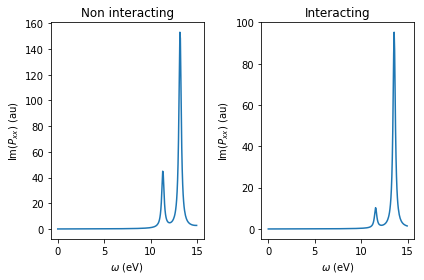

In [4]:
# plot polarizability with matplotlib
%matplotlib inline

fig = plt.figure(1)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(siesta.results["freq range"], siesta.results["polarizability nonin"][:, 0, 0].imag)
ax2.plot(siesta.results["freq range"], siesta.results["polarizability inter"][:, 0, 0].imag)

ax1.set_xlabel(r"$\omega$ (eV)")
ax2.set_xlabel(r"$\omega$ (eV)")

ax1.set_ylabel(r"Im($P_{xx}$) (au)")
ax2.set_ylabel(r"Im($P_{xx}$) (au)")

ax1.set_title(r"Non interacting")
ax2.set_title(r"Interacting")

fig.tight_layout()